In [33]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

# Load sessions

In [34]:
ID = 149
path = '/Volumes/freeman/Nick/mVR/sessions'

logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_behavior_log.xlsx'
log = pd.read_excel(logpath)

#149 run on antibiasL, L is correct, R is incorrect

In [35]:
sessions = log[(log.AnimalNum == ID)]
unbiased = sessions[(sessions.SessionType == 'unbiased')]
antibiasL = sessions[(sessions.SessionType == 'antibiasL')]
sessions = (pd.concat([unbiased,antibiasL])).sort()
session_vals= [int(x) for x in sessions.SessionNum]
print sessions


    AnimalNum  SessionNum SessionType
22        149          54    unbiased
23        149          62    unbiased
24        149          69    unbiased
25        149          73   antibiasL
26        149          77   antibiasL
27        149          81   antibiasL
28        149          85    unbiased
29        149          87    unbiased


In [36]:
summary = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals]
#Load all sessions for an animal

In [37]:
mean_trials = np.mean([(len(x))for x in summary])

In [38]:
unbiased_idx = [0,1,2,6,7]
antibias_idx = [3,4,5]
len(summary[0])

118

In [39]:
summary = [mvr.correctR(x) for x in summary]    

# Create dot plot

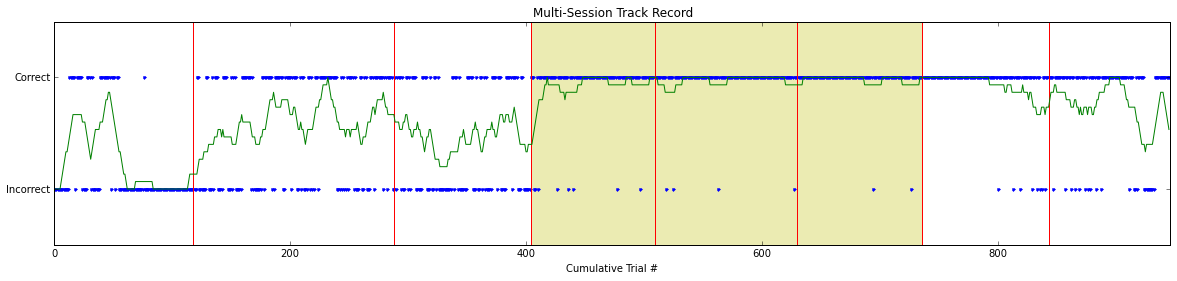

In [40]:
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[2],len_array[5], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Track Record')

avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 

946 946


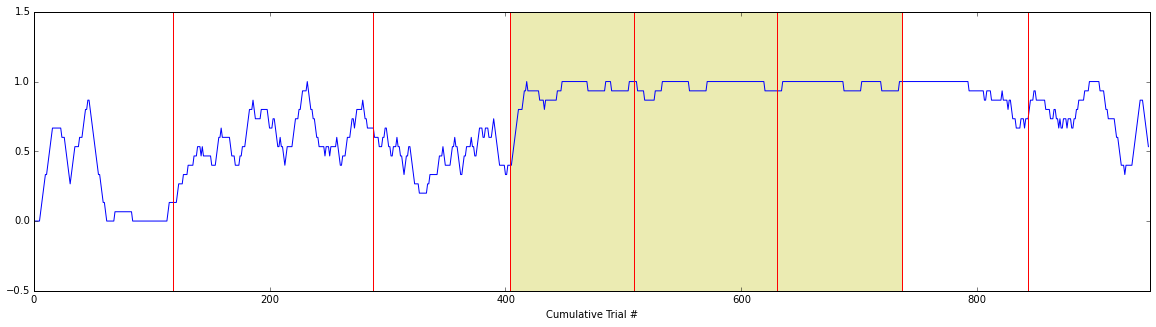

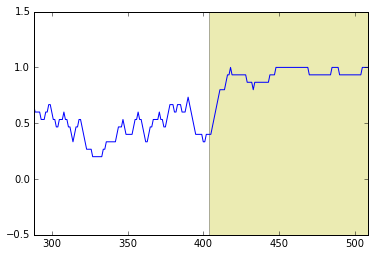

In [41]:
#Moving Average
plt.figure(figsize = [20,5])
avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')


plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[2],len_array[5], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')

plt.figure(2)
plt.plot(avgs) 
plt.ylim(-0.5,1.5)
plt.xlim(len_array[1],len_array[3])
plt.axvspan(len_array[2],len_array[5], facecolor = 'y', alpha = 0.3)

zoom = avgs[len_array[2]-40:len_array[2]+40]
zoom  = pd.Series(zoom)
zoom.to_csv(path + "/rollingavg149.csv")


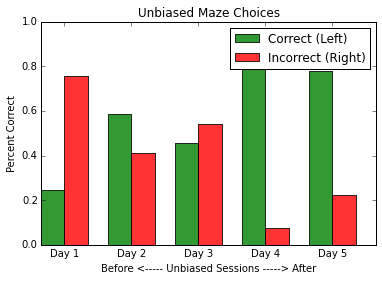

In [42]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in unbiased_idx:
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ('Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5')  #Unbiased days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('Before <----- Unbiased Sessions -----> After')
plt.ylabel('Percent Correct')
plt.title('Unbiased Maze Choices')
plt.show()



# Plot Animal Performance

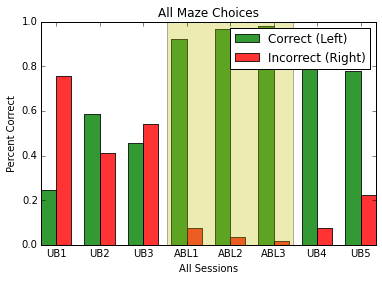

0.430298185902 0.957294582681 0.850966336993


In [43]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in range(8):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ['UB1', 'UB2', 'UB3','ABL1', 'ABL2', 'ABL3', 'UB4', 'UB5']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Correct (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Incorrect (Right)')

plt.legend()
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(2.9,5.8, facecolor = 'y', alpha = 0.3)
plt.show()

mu_perc_corrUB_before = np.mean(c[0:3])
mu_perc_corrAB = np.mean(c[3:6])
mu_perc_corrUB_after = np.mean(c[6:8])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after

# Time stats

[10.54715254237288, 7.31304705882353, 11.085206896551721, 11.680323809523806, 10.154793388429752, 11.565773584905662, 12.211102803738317, 11.397689320388343, 20.12234782608696, 11.796910891089107]
[0      10.068
1       8.066
2       9.054
3       7.006
4       6.298
5       6.140
6       6.510
7       7.960
8       6.208
9       6.008
10      6.358
11      6.336
12      8.536
13      6.262
14      7.408
15      6.482
16      6.174
17      6.264
18      5.898
19      7.390
20      7.430
21      7.704
22      8.674
23      8.462
24      6.682
25      6.450
26      6.398
27      5.966
28      6.150
29      7.860
        ...  
88     19.024
89     13.066
90     15.218
91      7.374
92     17.488
93      8.948
94      7.044
95      7.306
96      5.442
97      4.444
98     34.518
99     42.770
100    21.750
101    28.544
102    19.290
103    13.392
104     7.124
105    11.498
106     7.986
107    28.244
108    76.474
109    14.104
110    16.256
111    28.330
112     6.286
113    14.522
114 

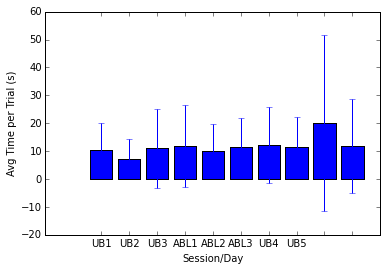

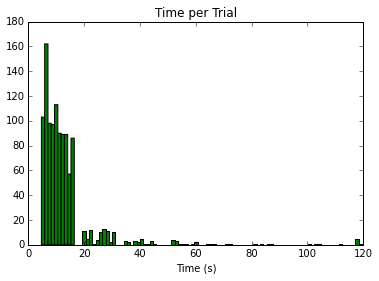

In [70]:
# Mean Time per trial
mu_time = []
std_time = []

[mu_time.append(x.time.mean()) for x in summary]
[std_time.append(x.time.std()) for x in summary]
print mu_time

plt.bar(range(0,len(mu_time)), mu_time, align = "center", yerr = std_time)
labels = ['UB1', 'UB2', 'UB3','ABL1', 'ABL2', 'ABL3', 'UB4', 'UB5']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time per Trial (s)')

plt.figure(2)
t = []
[t.append(x.time) for x in summary]
plt.hist(t,8, facecolor = 'g')
plt.title('Time per Trial')
plt.xlabel('Time (s)')
            
            

[1.8992033898305092, 1.9368705882352937, 1.7473793103448279, 4.241066666666668, 1.9462148760330582, 1.9066037735849048, 2.141570093457944, 1.9116116504854366, 10.82498550724638, 3.2189900990099014]
[1.1350031481512275, 1.4283733603390534, 1.2166532974421724, 9.594038277319235, 2.277606694195362, 1.8778881181706693, 1.7934066671600566, 1.1516854165467512, 25.523280322604652, 6.261219591253846]
[0       3.332
1       2.698
2       3.002
3       1.678
4       1.610
5       1.680
6       1.708
7       2.900
8       1.438
9       1.358
10      1.354
11      2.072
12      3.294
13      2.110
14      2.274
15      2.348
16      2.072
17      1.544
18      1.804
19      1.890
20      2.070
21      2.088
22      3.366
23      2.084
24      1.472
25      2.070
26      2.122
27      1.322
28      1.912
29      3.534
        ...  
88      2.280
89      1.920
90      1.740
91      1.304
92      1.284
93      1.300
94      1.198
95      1.942
96      0.942
97      1.034
98      1.276
99      1.598
1

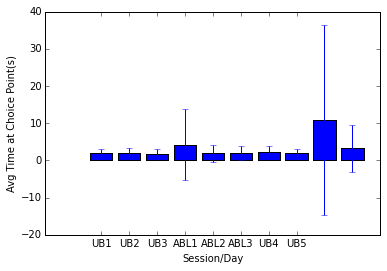

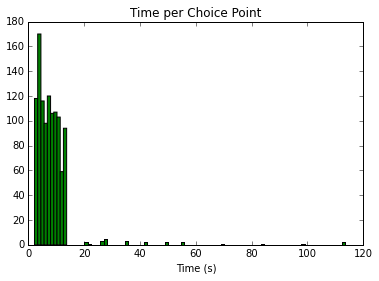

In [69]:
mu_choice = []
std_choice = []

[mu_choice.append(x.timeChoice.mean()) for x in summary]
[std_choice.append(x.timeChoice.std()) for x in summary]
print mu_choice
print std_choice

plt.bar(range(0,len(mu_choice)), mu_choice, align = "center", yerr = std_choice)
labels = ['UB1', 'UB2', 'UB3','ABL1', 'ABL2', 'ABL3', 'UB4', 'UB5']
ypos = np.arange(len(mu_time))
plt.xticks(ypos,labels)
plt.xlabel('Session/Day')
plt.ylabel('Avg Time at Choice Point(s)')

plt.figure(2)
choice = []
[choice.append(x.timeChoice) for x in summary]
#choice.sort()
#print choice
plt.hist(choice,8, facecolor = 'g')
plt.title('Time per Choice Point')
plt.xlabel('Time (s)')
            
            

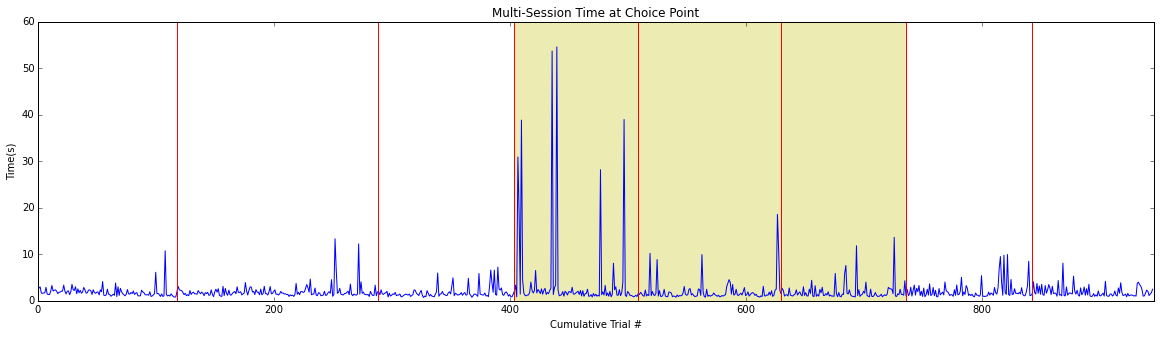

In [46]:
#Plot Choice Time acros all sessions
plt.figure(figsize = [20,5])

tchoice_array = []
len_array = []
for a in range(len(summary)):
    tchoice_array += list(summary[a].timeChoice)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(tchoice_array,'-')
#plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[2],len_array[5], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
#plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Time at Choice Point')

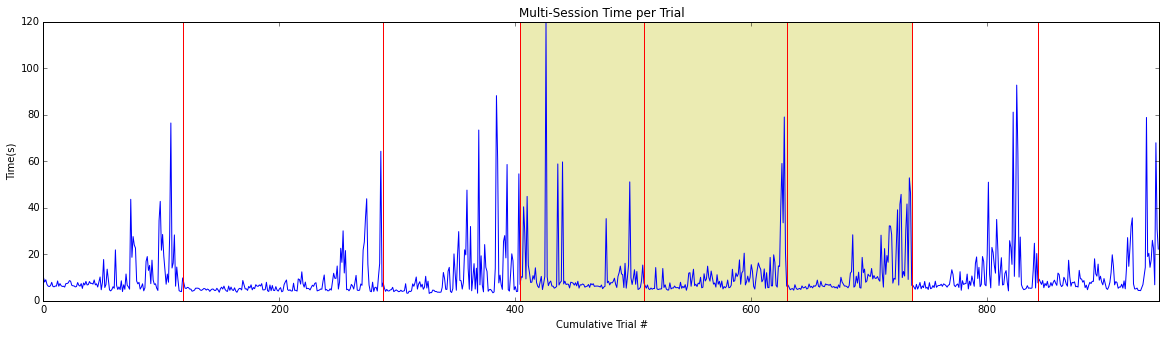

In [47]:
#Plot Trial Time acros all sessions
plt.figure(figsize = [20,5])

time_array = []
len_array = []
for a in range(len(summary)):
    time_array += list(summary[a].time)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(time_array,'-')
#plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[2],len_array[5], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
#plt.yticks([0,1],['Incorrect','Correct'])
plt.title('Multi-Session Time per Trial')

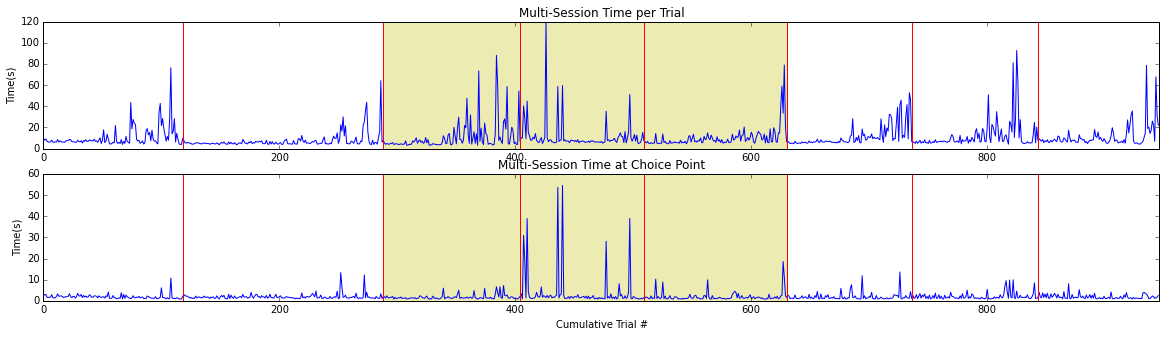

In [48]:
#Subplot
plt.figure(figsize = [20,5])
plt.subplot(211)
plt.plot(time_array,'-')
plt.xlim(0,max(len_array))
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
[plt.axvline(x =a, color='r') for a in len_array]
#plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time per Trial')


plt.subplot(212)
plt.plot(tchoice_array,'-')
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[1],len_array[4], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')
plt.title('Multi-Session Time at Choice Point')


1


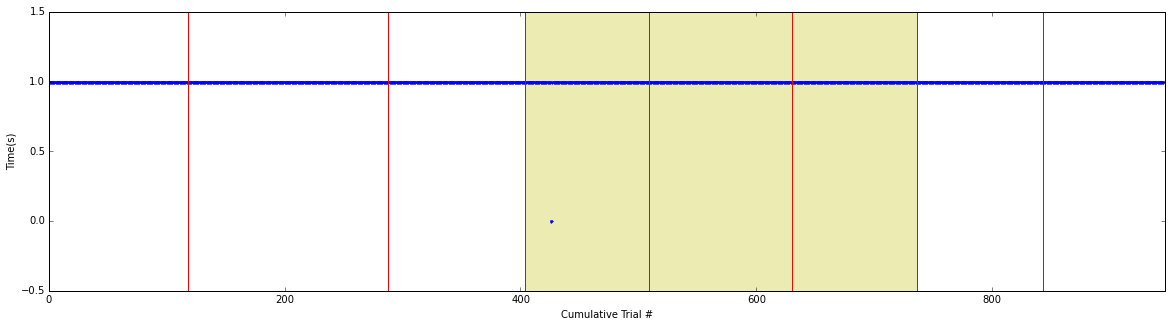

In [49]:
completion  = []
for b in range(len(summary)):
    completion += list(summary[b].Completed)
    
plt.figure(figsize = [20,5])
plt.plot(completion,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[2],len_array[5], facecolor = 'y', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.ylabel('Time(s)')

num_incomplete = completion.count(0)
print num_incomplete

In [50]:
num_deadend = 0
for b in antibias_idx:
    num_deadend += list(summary[b].deadEnd).count(1)
    
print num_deadend

14


In [51]:
#Summary vals for all of an animal's sessions
animal_summary = {'totalDeadEnd': num_deadend, 
                  'incomplete': num_incomplete, 
                  'meanNumTrials' : mean_trials,
                  'meanTime' : np.mean(time_array),
                  'meanChoice': np.nanmean(tchoice_array),
                  'numDays': len(summary),
                  'correctBefore': mu_perc_corrUB_before,
                  'correctAntibias': mu_perc_corrAB,
                  'correctAfter' : mu_perc_corrUB_after,
                  'Animal' :149,}

In [52]:
animal_summary = pd.Series(animal_summary)

In [53]:
animal_summary.to_csv( path + "/animalsummary149.csv")

In [54]:
animal_summary

Animal             149.000000
correctAfter         0.850966
correctAntibias      0.957295
correctBefore        0.430298
incomplete           1.000000
meanChoice           2.182894
meanNumTrials      118.250000
meanTime            10.502486
numDays              8.000000
totalDeadEnd        14.000000
dtype: float64

# Add pro-bias session analysis

In [55]:
logpath = '/Users/MJAY-MAC/Desktop/GITHUB/mVR-meta/mvr_extraswitch_log.xlsx'
extralog = pd.read_excel(logpath)
extralog

extra_sessions = extralog[(extralog.AnimalNum == 149)]
antibiasR = extra_sessions[(extra_sessions.SessionType == 'antibiasR')]
sessions = (pd.concat([unbiased,antibiasL,antibiasR])).sort(columns = 'SessionNum')
session_vals= [int(x) for x in sessions.SessionNum]
print sessions

    AnimalNum  SessionNum SessionType
22        149          54    unbiased
23        149          62    unbiased
24        149          69    unbiased
25        149          73   antibiasL
26        149          77   antibiasL
27        149          81   antibiasL
28        149          85    unbiased
29        149          87    unbiased
2         149          92   antibiasR
3         149          95   antibiasR


In [56]:
summary_extra = [pd.read_csv(path + '/0000' + str(x) + '/summary/trial_summary' + str(x)+ '.csv') for x in session_vals[-2:]]

summary_extra = [mvr.correctR(x) for x in summary_extra]
summary+=summary_extra

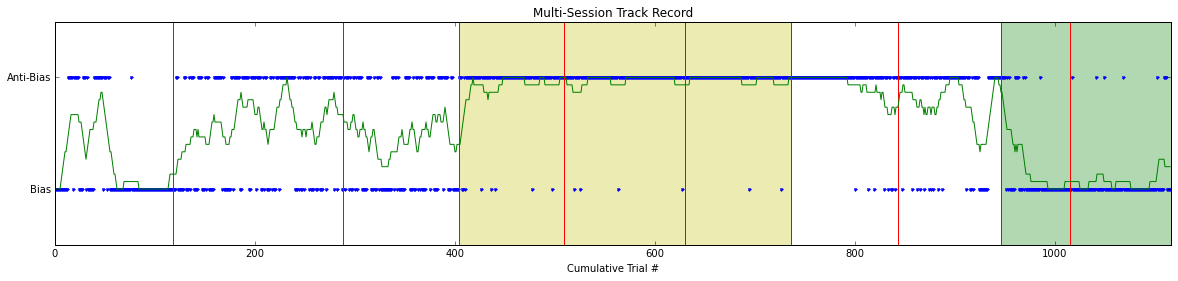

In [57]:
#Plot Correct Track Record acros all sessions (main behavior)
plt.figure(figsize = [20,4])

dot_array = []
len_array = []
for a in range(len(summary)):
    dot_array += list(summary[a].Correct)
    len_array.append(len(summary[a]))
    
len_array = list(np.cumsum(len_array))

plt.plot(dot_array,'.')
plt.ylim(-0.5,1.5)
plt.xlim(0,max(len_array))
[plt.axvline(x =a, color='r') for a in len_array]
plt.axvspan(len_array[2],len_array[5], facecolor = 'y', alpha = 0.3)
plt.axvspan(len_array[7],len_array[9], facecolor = 'g', alpha = 0.3)
plt.xlabel('Cumulative Trial #')
plt.yticks([0,1],['Bias','Anti-Bias'])
plt.title('Multi-Session Track Record')


avgs = []
binsize = 15
kernel = np.ones(binsize,)/float(binsize)
avgs = np.convolve(dot_array,kernel, 'same')
plt.plot(avgs) 

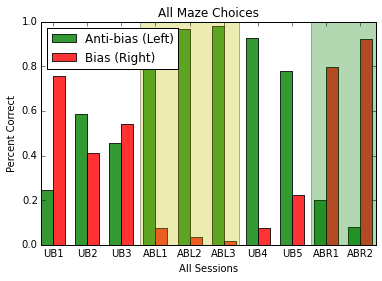

0.430298185902 0.957294582681 0.850966336993


In [60]:
#Plot Unbiased Correct (L correct, R incorrect)
c = [] #correct/left
for j in range(len(summary)):
    
    correct = list(summary[j].Correct).count(True)
    perc_correct = correct/float(len(summary[j]))
    #print perc_correct
    c.append(perc_correct)


w = [1-x for x in c]
#wrong/right side

labels = ['UB1', 'UB2', 'UB3','ABL1', 'ABL2', 'ABL3', 'UB4', 'UB5', 'ABR1', 'ABR2']  #All days
y_pos = np.arange(len(w))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(y_pos, c, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Anti-bias (Left)')
 
rects2 = plt.bar(y_pos + bar_width, w, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Bias (Right)')

plt.legend(loc = 'best')
plt.xticks(y_pos+bar_width, labels)
plt.xlabel('All Sessions')
plt.ylabel('Percent Correct')
plt.title('All Maze Choices')
plt.axvspan(2.9,5.8, facecolor = 'y', alpha = 0.3)
plt.axvspan(7.9,9.8, facecolor = 'g', alpha = 0.3)
plt.show()

mu_perc_corrUB_before = np.mean(c[0:3])
mu_perc_corrAB = np.mean(c[3:6])
mu_perc_corrUB_after = np.mean(c[6:8])

print mu_perc_corrUB_before, mu_perc_corrAB, mu_perc_corrUB_after